# Playing with the data

In [1]:
import pandas as pd
import statistics as stat
import matplotlib as plt

In [2]:
emissions_df = pd.read_csv('Emissions_Inventory.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Emissions_Inventory.csv'

In [ ]:
emissions_df.head(20)

,OBJECTID,DATA_TYPE,POLLUTANT_CODE,SCC,EMISSIONS,EPA_REGION_CODE,STATE,FIPS_STATE_CODE,TRIBAL_NAME,FIPS_CODE,...,EMISSIONS_OPERATING_TYPE,EMISSIONS_UOM,SCC_LEVEL_ONE,SCC_LEVEL_TWO,SCC_LEVEL_THREE,SCC_LEVEL_FOUR,POLLUTANT_DESCRIPTION,POLLUTANT_TYPE,DATASET_YEAR,GLOBALID
0,1,Point,PM-CON,20100101,0.715543,3,District of Columbia,11,NaN,11001,...,R,TON,Internal Combustion Engines,Electric Generation,Distillate Oil (Diesel),Turbine,PM Condensible,CAP,2008NEI,{3A25960B-3AD0-49B8-9328-53113F7A5C33}
1,2,Point,PM-CON,30500245,0.000000,3,District of Columbia,11,NaN,11001,...,R,TON,Industrial Processes,Mineral Products,Asphalt Concrete,"Batch Mix Plant: Hot Elevators, Screens, Bins,...",PM Condensible,CAP,2008NEI,{4C420866-F128-4F2E-BC0B-54482ECBAD67}
2,3,Point,PM10-FIL,10200501,0.787603,3,District of Columbia,11,NaN,11001,...,R,TON,External Combustion Boilers,Industrial,Distillate Oil - Grades 1 and 2,Boiler,PM10 Filterable,CAP,2008NEI,{D6587D6F-B31D-45E8-8BFB-C4D95FED146C}
3,4,Point,PM10-FIL,10200601,3.149634,3,District of Columbia,11,NaN,11001,...,R,TON,External Combustion Boilers,Industrial,Natural Gas,> 100 Million BTU/hr,PM10 Filterable,CAP,2008NEI,{1A95A72C-E4CA-4A97-B796-48FECC4E5C6E}
4,5,Point,PM10-FIL,10300209,0.558720,3,District of Columbia,11,NaN,11001,...,R,TON,External Combustion Boilers,Commercial/Institutional,Bituminous Coal,Spreader Stoker,PM10 Filterable,CAP,2008NEI,{9B0FA227-A2E5-4B69-ABB6-321F1507B3C8}
5,6,Point,PM10-FIL,10300501,0.027897,3,District of Columbia,11,NaN,11001,...,R,TON,External Combustion Boilers,Commercial/Institutional,Distillate Oil - Grades 1 and 2,Boiler,PM10 Filterable,CAP,2008NEI,{517A62B4-AB1F-4499-907A-22C9AC03CAAC}
6,7,Point,PM10-FIL,10300502,0.628802,3,District of Columbia,11,NaN,11001,...,R,TON,External Combustion Boilers,Commercial/Institutional,Distillate Oil,10-100 Million BTU/hr,PM10 Filterable,CAP,2008NEI,{3A87674B-6562-4CEA-B6A1-E7684B956A70}
7,8,Point,PM10-FIL,10300503,0.052260,3,District of Columbia,11,NaN,11001,...,R,TON,External Combustion Boilers,Commercial/Institutional,Distillate Oil,< 10 Million BTU/hr,PM10 Filterable,CAP,2008NEI,{D449CF57-DE6D-41D7-B291-B858A0323BD8}
8,9,Point,PM10-FIL,10300504,0.258113,3,District of Columbia,11,NaN,11001,...,R,TON,External Combustion Boilers,Commercial/Institutional,Distillate Oil,Grade 4 Oil,PM10 Filterable,CAP,2008NEI,{C9C54F2E-E0FF-4554-AB4C-272298FC59D2}
9,10,Point,PM10-FIL,10300601,0.826593,3,District of Columbia,11,NaN,11001,...,R,TON,External Combustion Boilers,Commercial/Institutional,Natural Gas,> 100 Million BTU/hr,PM10 Filterable,CAP,2008NEI,{628066EB-B3D0-4787-B164-3A05E5107877}


In [ ]:
emissions_df.columns

Index(['OBJECTID', 'DATA_TYPE', 'POLLUTANT_CODE', 'SCC', 'EMISSIONS',
       'EPA_REGION_CODE', 'STATE', 'FIPS_STATE_CODE', 'TRIBAL_NAME',
       'FIPS_CODE', 'COUNTY', 'REPORTING_PERIOD', 'EMISSIONS_OPERATING_TYPE',
       'EMISSIONS_UOM', 'SCC_LEVEL_ONE', 'SCC_LEVEL_TWO', 'SCC_LEVEL_THREE',
       'SCC_LEVEL_FOUR', 'POLLUTANT_DESCRIPTION', 'POLLUTANT_TYPE',
       'DATASET_YEAR', 'GLOBALID'],
      dtype='object')

In [ ]:
select_df = emissions_df[['OBJECTID', 'POLLUTANT_CODE', 'EMISSIONS', 'EMISSIONS_UOM', 'SCC_LEVEL_ONE', 'POLLUTANT_DESCRIPTION']]

In [ ]:
select_df.head()

,OBJECTID,POLLUTANT_CODE,EMISSIONS,EMISSIONS_UOM,SCC_LEVEL_ONE,POLLUTANT_DESCRIPTION
0,1,PM-CON,0.715543,TON,Internal Combustion Engines,PM Condensible
1,2,PM-CON,0.000000,TON,Industrial Processes,PM Condensible
2,3,PM10-FIL,0.787603,TON,External Combustion Boilers,PM10 Filterable
3,4,PM10-FIL,3.149634,TON,External Combustion Boilers,PM10 Filterable
4,5,PM10-FIL,0.558720,TON,External Combustion Boilers,PM10 Filterable


In [ ]:
#create list of unique level ones
l = list(select_df['SCC_LEVEL_ONE'])
level_ones = []
for i in l:
    if i in level_ones:
        pass
    else:
        level_ones.append(i)

level_ones

['Internal Combustion Engines',
 'Industrial Processes',
 'External Combustion Boilers',
 'Chemical Evaporation',
 'Mobile Sources',
 'Stationary Source Fuel Combustion',
 'Solvent Utilization',
 'Waste Disposal, Treatment, and Recovery',
 'Storage and Transport',
 'Miscellaneous Area Sources',
 nan,
 'Waste Disposal']

In [ ]:
x = select_df.loc[select_df['SCC_LEVEL_ONE'] == "Industrial Processes"]

indust_proc_avg = round(stat.mean(list(x['EMISSIONS'])), 3)
print(f'{indust_proc_avg} Tons')

363.373 Tons


In [ ]:
DCemissions = pd.read_csv('DCemissions.csv')

In [ ]:
DCemissions.head()

,State,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015,2016,2017,2018,2019,2020,Percent,Absolute,Percent.1,Absolute.1
0,District of Columbia,13.6,11.9,11.3,11.9,9.8,7.9,7.7,7.9,7.5,...,3.0,2.8,2.6,2.9,2.8,2.4,-82.4%,-11.2,-14.5%,-0.4


In [ ]:
DCtemps = pd.read_csv('DCtemps.csv')

In [ ]:
DCtemps.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,...,NOV,DEC,ANN,WINTER,SPRING,SUMMER,AUTUMN,1ST HALF,2ND HALF,Unnamed: 20
0,1970,30.0,37.1,41.9,55.3,68.3,75.2,79.2,79.0,75.0,...,49.3,39.7,57.7,34.5,55.2,77.8,62.3,51.3,64.1,NaN
1,1971,31.3,39.1,43.2,55.0,63.7,75.9,78.3,76.7,73.0,...,48.2,45.5,57.9,36.7,54.0,77.0,62.0,51.4,64.4,NaN
2,1972,38.5,36.5,45.6,54.1,64.6,70.2,77.5,75.9,71.0,...,46.8,43.6,56.7,40.2,54.8,74.5,57.9,51.6,61.8,NaN
3,1973,37.6,37.0,51.1,56.0,62.8,77.1,79.2,79.9,74.3,...,51.6,41.9,59.3,39.4,56.6,78.7,63.1,53.6,65.0,NaN
4,1974,42.9,39.2,49.2,58.3,65.1,71.5,79.0,78.4,70.2,...,50.9,43.1,58.8,41.3,57.5,76.3,59.5,54.4,63.2,NaN


In [ ]:
DCtempsdf = DCtemps[['YEAR', 'ANN']]
DCtempsdf.head()

,YEAR,ANN
0,1970,57.7
1,1971,57.9
2,1972,56.7
3,1973,59.3
4,1974,58.8


In [ ]:
DCemissions.drop(columns=['Percent', 'Absolute', 'Percent.1', 'Absolute.1'], inplace=True)

In [ ]:
DCemissionsdf = DCemissions.melt(id_vars='State', var_name='Year', value_name='CO2EMISSIONS')


In [ ]:
DCemissionsdf.head()

,State,Year,CO2EMISSIONS
0,District of Columbia,1970,13.6
1,District of Columbia,1971,11.9
2,District of Columbia,1972,11.3
3,District of Columbia,1973,11.9
4,District of Columbia,1974,9.8


In [ ]:
DCemissionsdf.drop(columns=['State'], inplace=True)
DCemissionsdf.head()

,Year,CO2EMISSIONS
0,1970,13.6
1,1971,11.9
2,1972,11.3
3,1973,11.9
4,1974,9.8


In [ ]:
merged = pd.concat([DCtempsdf, 
                    DCemissionsdf],
                   axis=1)
merged.head()

,YEAR,ANN,Year,CO2EMISSIONS
0,1970,57.7,1970,13.6
1,1971,57.9,1971,11.9
2,1972,56.7,1972,11.3
3,1973,59.3,1973,11.9
4,1974,58.8,1974,9.8


In [ ]:
merged.drop(columns=['Year'], inplace=True)
merged.head()

,YEAR,ANN,CO2EMISSIONS
0,1970,57.7,13.6
1,1971,57.9,11.9
2,1972,56.7,11.3
3,1973,59.3,11.9
4,1974,58.8,9.8


In [ ]:
merged.set_index(merged['YEAR'], inplace=True) #.drop(columns=['YEAR'], inplace=True)

In [ ]:
merged.drop(columns=['YEAR'], inplace=True)

In [ ]:
merged.rename(columns={'ANN': 'Annual_Temp(F)', 'CO2EMISSIONS': 'CO2_Emissions(Tons)'}, inplace=True)

In [ ]:
merged.head()


,Annual_Temp(F),CO2_Emissions(Tons)
YEAR,,
1970,57.7,13.6
1971,57.9,11.9
1972,56.7,11.3
1973,59.3,11.9
1974,58.8,9.8


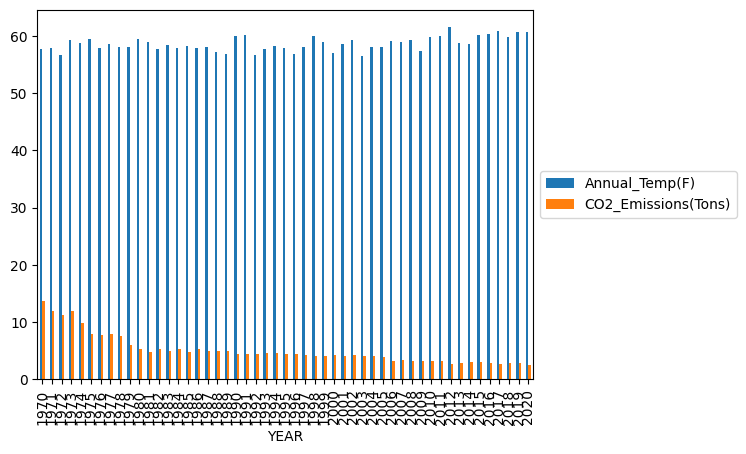

In [ ]:
ax = merged.plot.bar(stacked=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))